#Food Vision Big

##check gpu

In [ ]:
!nvidia-smi

Fri Jul  2 03:05:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Mixed precision is only compaitable with gpu score 7.0+.

In [ ]:
##Get Helper functions

In [1]:
!pip install tensorflow==2.4.1


     |████████████████████████████████| 394.3MB 45kB/s 
     |████████████████████████████████| 2.9MB 42.9MB/s 
     |████████████████████████████████| 471kB 45.5MB/s 
     |████████████████████████████████| 3.8MB 34.9MB/s 
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2021-07-02 04:31:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-02 04:31:51 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import plot_loss_curves,compare_historys

In [4]:
#using tensorflow datasets
import tensorflow_datasets as tfds

In [5]:
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [6]:
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True,#get lables and data both
                                             with_info=True)#download the matadeta aswell

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteOVOWI8/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteOVOWI8/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


##Exploring the Food101 data from the Tensorflow Datasets
we need to find..
* class_names
* shape of out input data(image tensors)
* datatype of out input data
* what labels look like(onehot or label encoded)
* labels match with classnames

In [7]:
#Features of the Food101 from tfds
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
train_one_sample = train_data.take(1)
train_data

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [10]:
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [11]:
#output info about our training sample
for image,label in train_one_sample:
  print("Image shape: ",image.shape)
  print("Image datatype", image.dtype)
  print("Target class from Food 101 : ", label)
  print("Class name : ",class_names[label.numpy()])
  print("label :", label)

Image shape:  (512, 512, 3)
Image datatype <dtype: 'uint8'>
Target class from Food 101 :  tf.Tensor(16, shape=(), dtype=int64)
Class name :  cheesecake
label : tf.Tensor(16, shape=(), dtype=int64)


In [12]:
#what out image tensor look like
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

In [13]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

##Plot the image from TFDS food 101 dataset

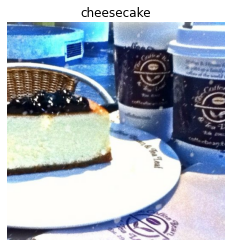

In [14]:
import matplotlib.pyplot as plt
plt.title(class_names[label.numpy()])
plt.axis(False)
plt.imshow(image)

##Create preprocessing functions for out data

neural networks works best when data is feed in a certain way(batched, normalised)
what we know about our data
* in `uint8` datatype
* comprises of all sort of sizes
* not scaled

what we want our model to be like
* data in `float32`
* batches should have images of same size
* normalised tensors perform better 

ps: no need to normalise(rescale) is we are using efficientnetBx beacuse the model is build in a way that it has rescaling layers built in
so out images have to be 
* reshaped to same size
* datatype should be `float32`

In [15]:
def preprocess_img(image,label,image_size=224):
  #convert image datatype from uint8 to float32
  # reshapes all the images to the same size
  image = tf.image.resize(image,(224,224))
  return tf.cast(image,tf.float32),label # returns a tuple of (floast32, label)

In [16]:
preprocessed_img = preprocess_img(image,label)[0]
preprocessed_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 84.67857 ,  84.321434,  92.321434],
        [ 87.19898 ,  86.841835,  94.841835],
        [ 84.72959 ,  84.581635,  94.72449 ],
        ...,
        [119.50503 , 194.93877 , 245.85202 ],
        [114.974525, 190.97452 , 241.90309 ],
        [119.071465, 196.4286  , 247.82652 ]],

       [[ 75.647964,  84.21939 ,  93.21939 ],
        [ 71.45407 ,  80.959175,  89.959175],
        [ 78.03061 ,  87.20408 ,  97.47449 ],
        ...,
        [113.31632 , 182.62755 , 249.35715 ],
        [106.57655 , 176.86227 , 245.4337  ],
        [108.601944, 179.9796  , 248.16833 ]],

       [[129.9949  , 152.06633 , 171.4949  ],
        [149.87756 , 171.94899 , 192.66328 ],
        [156.43878 , 178.29593 , 201.22449 ],
        ...,
        [127.94895 , 184.08676 , 236.39796 ],
        [129.41847 , 186.4899  , 238.41847 ],
        [132.56607 , 191.07118 , 243.63744 ]],

       ...,

       [[ 68.23475 ,  72.091934,  90.73993 ],
        [ 67.

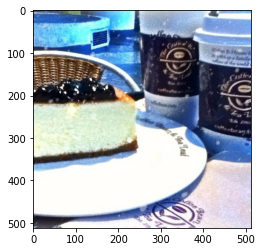

In [17]:
plt.imshow(image)

## Batching our dataset

In [18]:
train_data = train_data.map(map_func=preprocess_img,
                            num_parallel_calls=tf.data.AUTOTUNE)#maps this function to whole training dataset
#autotune utilizes all the computational power available
#shuffling our data aur batching and prefetch it(loads the upcoming batch size ready)
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.map(map_func=preprocess_img,
                          num_parallel_calls=tf.data.AUTOTUNE)

test_data = test_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE).cache()

In [19]:
train_data,test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <CacheDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

What prefetch does is that upcoming data is prepared by cpu while the current data gets computed in gpu
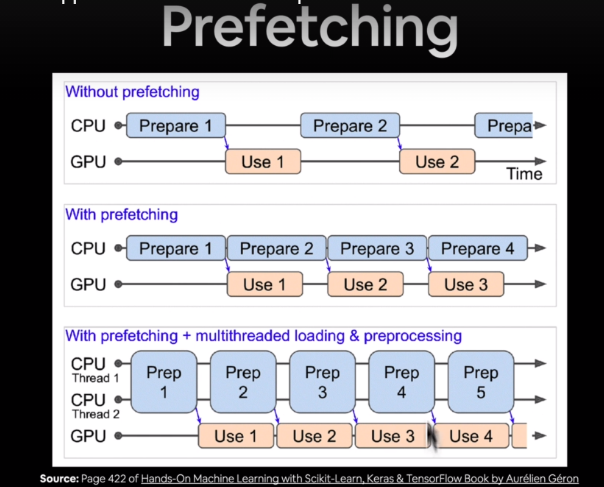

##Create modelling callbacks
* tensorboard callbacks
* modelcheckpoint callbacks

In [20]:
from helper_functions import create_tensorboard_callback

In [21]:
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                     monitor="val_acc",
                                                     save_best_only=True,
                                                     save_weights_only=True,
                                                     verbose=0)

##Setup mixed precision training

In [22]:
#turn on mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


##Buid feature extraction model

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=(224,224,3), name="input_layer")
#no need to add preprocessing layer when using efficientnetBX model

x = base_model(inputs, training=False)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(len(class_names))(x)

outputs = layers.Activation("softmax", dtype = tf.float32)(x)
model = tf.keras.Model(inputs,outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16711680/16705208 [==============================] - 0s 0us/step


In [24]:
tf.__version__

'2.4.1'

In [ ]:
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d_2 True float32 <Policy "mixed_float16">
dense_2 True float32 <Policy "mixed_float16">
activation_2 True float32 <Policy "float32">


In [25]:
history = model.fit(train_data, 
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20210702-044627
Epoch 1/3
2368/2368 [==============================] - 239s 84ms/step - loss: 2.3248 - accuracy: 0.4644 - val_loss: 1.2173 - val_accuracy: 0.6772


Epoch 2/3
2368/2368 [==============================] - 186s 78ms/step - loss: 1.3105 - accuracy: 0.6597 - val_loss: 1.1209 - val_accuracy: 0.6997


Epoch 3/3
2368/2368 [==============================] - 188s 76ms/step - loss: 1.1522 - accuracy: 0.6980 - val_loss: 1.0832 - val_accuracy: 0.7074


In [26]:
model.save("Model_without_fine_tuning")

INFO:tensorflow:Assets written to: Model_without_fine_tuning/assets


INFO:tensorflow:Assets written to: Model_without_fine_tuning/assets


In [27]:
for layer in model.layers:
  layer.trainable=True


In [28]:
#seting up early Stopping to stop training is our model's val_loss doesnt improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [29]:
#when our model stops improving, we can callback to reduce the learning rate(concept of convergence)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 patience=2,
                                                 factor=0.2,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

In [34]:
history_2 = model.fit(train_data,
                      epochs=100,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      callbacks=[create_tensorboard_callback("traingin_logs",
                                                            "efficientnetB0_fine_tuned_model"),
                                model_checkpoint,
                                early_stopping,
                                reduce_lr])

Saving TensorBoard log files to: traingin_logs/efficientnetB0_fine_tuned_model/20210702-052229
Epoch 1/100
2368/2368 [==============================] - 329s 133ms/step - loss: 0.5029 - accuracy: 0.8632 - val_loss: 0.6597 - val_accuracy: 0.8263
INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


Epoch 2/100
2368/2368 [==============================] - 328s 138ms/step - loss: 0.2382 - accuracy: 0.9354 - val_loss: 0.7411 - val_accuracy: 0.8218
Epoch 3/100
2368/2368 [==============================] - 320s 132ms/step - loss: 0.1081 - accuracy: 0.9734 - val_loss: 0.9445 - val_accuracy: 0.8022

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 4/100
2368/2368 [==============================] - 315s 132ms/step - loss: 0.0344 - accuracy: 0.9946 - val_loss: 1.0733 - val_accuracy: 0.8130


In [1]:
model.evaluate(test_data)

NameError: ignored